In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

df=pd.read_csv("C:/Users/INSPIRON/Desktop/Mtech 1st sem/Mtech project/Neural project/bank/bank_predict.csv")
df.head(15)  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.describe()     # summary of numeric variables

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


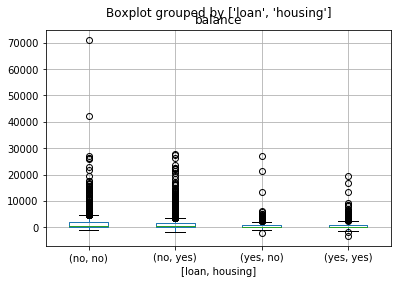

In [13]:
df.boxplot(column='balance',by=['loan','housing'])

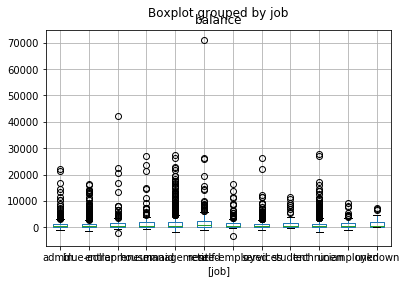

In [14]:
df.boxplot(column='balance',by=['job'])

In [43]:
temp1 = df['loan'].value_counts(ascending=True)
temp2 = df['housing'].value_counts(ascending=True)
temp3 = df.pivot_table(values='y',index=['loan'],aggfunc=lambda x: x.map({'yes':1,'no':0}).mean())
temp4 = df.pivot_table(values='y',index=['housing'],aggfunc=lambda x: x.map({'yes':1,'no':0}).mean())
temp5 = df.pivot_table(values='y',index=['loan','housing'],aggfunc=lambda x: x.map({'yes':1,'no':0}).mean())
print ('Frequency Table for loan status:') 
print (temp1)

print ('\nFrequency Table for housing loan status:') 
print (temp2)

print ('\nProbility of getting loan for Loan Status class:')
print (temp3)

print ('\nProbility of getting loan for Housing Loan Status class:')
print (temp4)

print ('\nProbility of getting loan for Loan and Housing Loan class:')
print (temp5)

Frequency Table for loan status:
yes     691
no     3830
Name: loan, dtype: int64

Frequency Table for housing loan status:
no     1962
yes    2559
Name: housing, dtype: int64

Probility of getting loan for Loan Status class:
             y
loan          
no    0.124804
yes   0.062229

Probility of getting loan for Housing Loan Status class:
                y
housing          
no       0.153415
yes      0.085971

Probility of getting loan for Loan and Housing Loan class:
                     y
loan housing          
no   no       0.168754
     yes      0.090571
yes  no       0.063158
     yes      0.061576


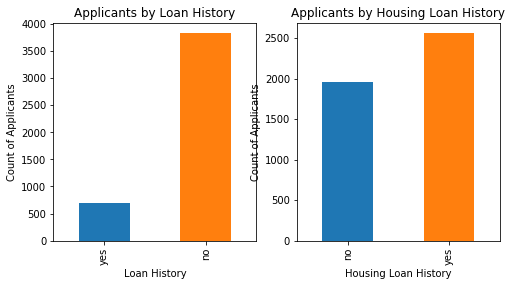

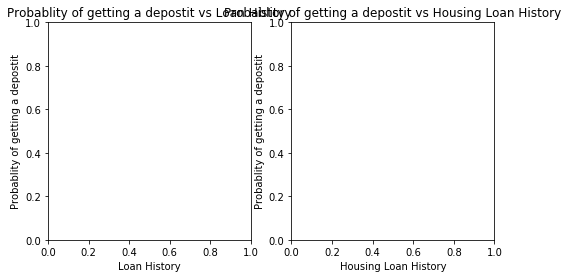

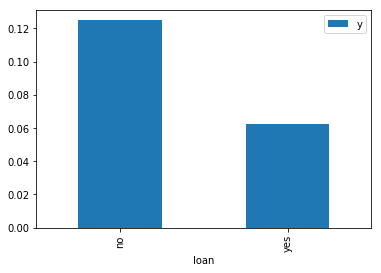

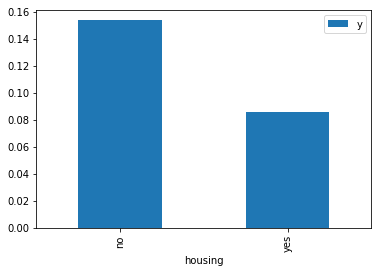

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Loan History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Loan History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Housing Loan History')
ax2.set_ylabel('Count of Applicants')
ax2.set_title("Applicants by Housing Loan History")
temp2.plot(kind='bar')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax3 = fig.add_subplot(121)
ax3.set_xlabel('Loan History')
ax3.set_ylabel('Probablity of getting a depostit')
ax3.set_title("Probablity of getting a depostit vs Loan History")
temp3.plot(kind='bar')

ax4 = fig.add_subplot(122)
ax4.set_xlabel('Housing Loan History')
ax4.set_ylabel('Probablity of getting a depostit')
ax4.set_title("Probablity of getting a depostit vs Housing Loan History")
temp4.plot(kind='bar')


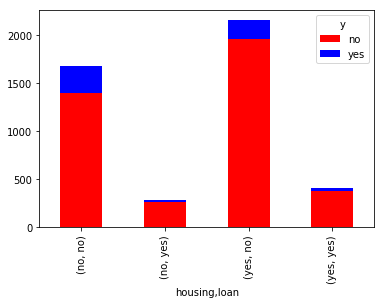

In [51]:
temp6 = pd.crosstab([df.housing,df.loan], df['y'])
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)